# Example for creating a corner plot
In cosmology we often show multidimensional posteriors as corner plots. These are usually created from the output of samplers like `emcee`, `multinest`, or `nautilus`. We here show how we can use the point cloud output of these samplers to generate nice corner plots with multiple posteriors and utilizing both the upper and lower triangle of a corner plot.

In [30]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
import niceplots as nicepl
from scipy.stats import gaussian_kde

In [31]:
# Setting niceplot default settings
nicepl.initPlot()

## Data read in
We read in three chains from the provided example posteriors. We need both the values (`chain`) and weights (`weight`) of the points. We also define the parameter names corresponding to the chain columns.

In [32]:
# chain1
chain1_data=np.load("ExamplePosterior1.npz")
chain1=chain1_data['samples']
weights1=np.exp(chain1_data['weights'])
param_names1=[r"$S_8$", r"$\Omega_\mathrm{m}$", r"$A_\mathrm{IA}$"]

# chain2
chain2_data=np.load("ExamplePosterior2.npz")
chain2=chain2_data['samples']
weights2=np.exp(chain2_data['weights'])
param_names2=[r"$S_8$", r"$\Omega_\mathrm{m}$", r"$A_\mathrm{IA}$"]

# chain3
chain3_data=np.load("ExamplePosterior3.npz")
chain3=chain3_data['samples']
weights3=np.exp(chain3_data['weights'])
param_names3=[r"$S_8$", r"$\Omega_\mathrm{m}$", r"$A_\mathrm{IA}$"]


## Parameter and prior definition

We now define which parameters to plot (the chains do not have to contain all of these parameters, the corresponding panels would be left empty) and what their prior range is. This prior range is what determines the borders of the plot.

In [33]:
param_names=[r"$S_8$", r"$\Omega_\mathrm{m}$", r"$A_\mathrm{IA}$"]


priors={
    r"$S_8$": [0.64, 0.85],
    r"$\Omega_\mathrm{m}$": [0.23008603805291986, 0.39969071100893877],
    r"$A_\mathrm{IA}$": [-0.5, 0.5],
}

## Single chain plot

We first plot a single posterior. Unused subplots are automatically turned off by `finalize`.

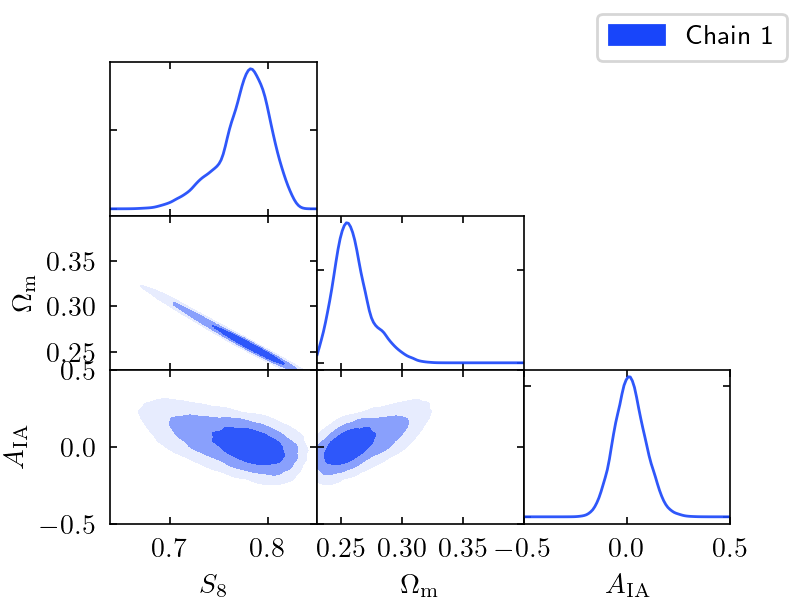

In [34]:
c=nicepl.corner(param_names=param_names, priors=priors)
c.add_chain(chain1, param_names1, weights1, color='C0', label="Chain 1")
c.finalize(outputFn="SingleChainCorner.pdf")

## Truth values
We can overplot true parameter values as dashed lines

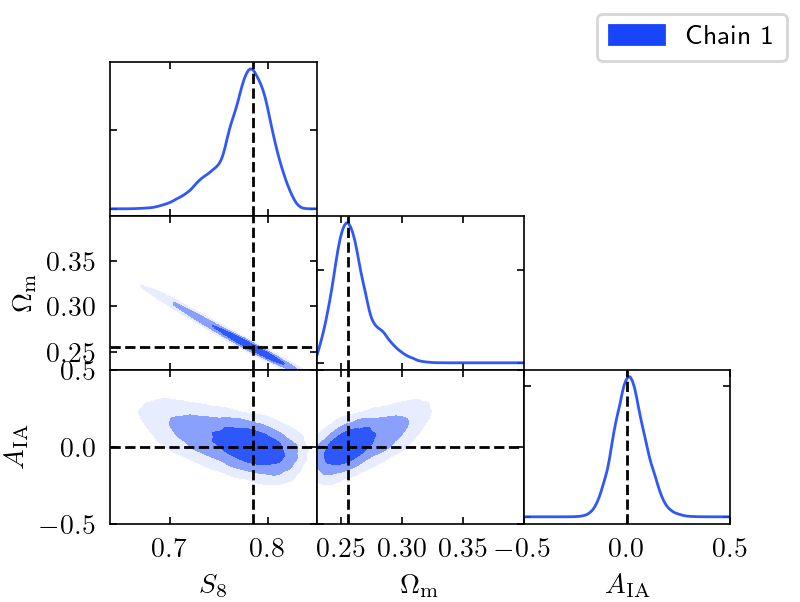

In [35]:
c=nicepl.corner(param_names=param_names, priors=priors)
c.add_chain(chain1, param_names1, weights1, color='C0', label="Chain 1")

c.add_truth(r"$S_8$", 0.785)
c.add_truth(r"$\Omega_\mathrm{m}$", 0.255)
c.add_truth(r"$A_\mathrm{IA}$", 0.0)

c.finalize(outputFn="SingleChainCorner_w_Truth.pdf")

## Multiple posteriors
We now plot multiple posteriors. The routine automatically generates a legend. Note how for `chain2` we only give part of the parameters, so only parts of the diagram are filled.

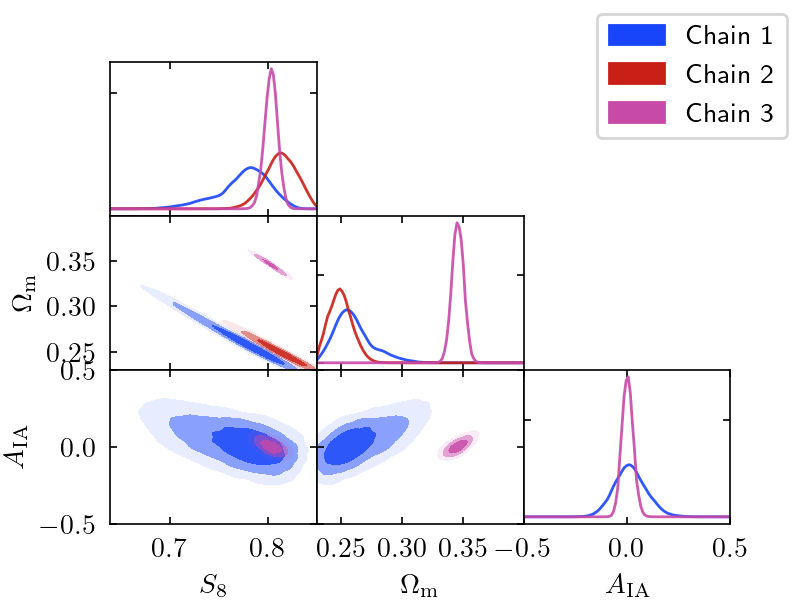

In [40]:
c=nicepl.corner(param_names=param_names, priors=priors)
c.add_chain(chain1, param_names1, weights1, 
            color='C0', label="Chain 1")
c.add_chain(chain2[:,:2], param_names2[:2], weights2, 
            color='C2', label="Chain 2")
c.add_chain(chain3, param_names3, weights3, 
            color='C3', label="Chain 3")

c.finalize(outputFn="MultipleChainCorner.pdf")

## Using the upper triangle

If we want to plot many posteriors, using only the lower triangle can become overcrowded. Therefore, we give the option to add chains also to the upper triangle. Note that axis values are still shared and we need to turn off the axis removal.

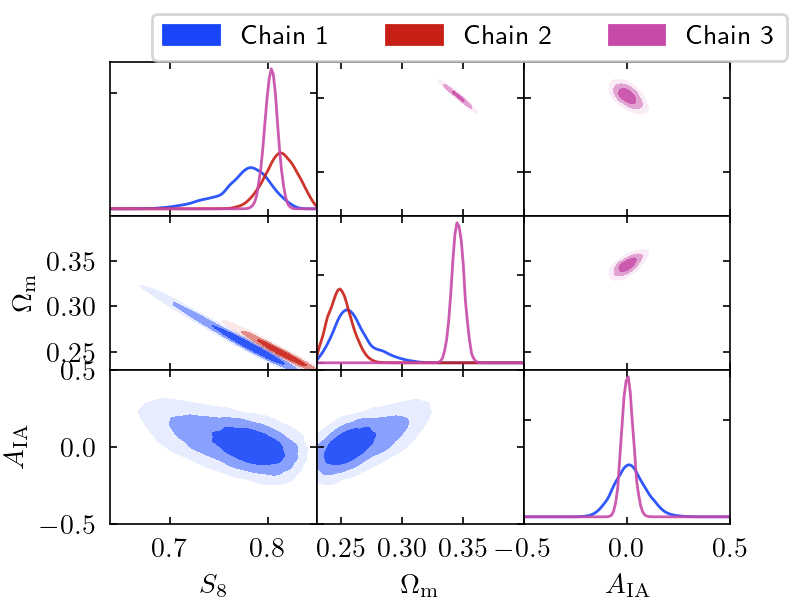

In [41]:
c=nicepl.corner(param_names=param_names, priors=priors)
c.add_chain(chain1, param_names1, weights1, 
            color='C0', label="Chain 1")
c.add_chain(chain2[:,:2], param_names2[:2], weights2, 
            color='C2', label="Chain 2")
c.add_chain(chain3, param_names3, weights3, 
            color='C3', label="Chain 3", lower_triangle=False)

c.finalize(outputFn="MultipleChainCorner_upperTriangle.pdf",
           hide_upper=False, legendcols=3)